# **Quantidade de questões do Enem 2019 por habilidades - Ciências Humanas**

---



O ENEM possui [Matrizes de Referência](http://download.inep.gov.br/download/enem/matriz_referencia.pdf) para cada uma de suas áreas (Matemática, Linguagens e Códigos, Ciência Humanas, etc). Cada matriz, é formada por uma série de habilidades que estão associadas às competências cobradas no ENEM. Por exemplo, a habilidade H3 da Matriz de Matemática é Resolver situação-problema envolvendo conhecimentos numéricos. 
O objetivo dessa análise é explorar os [dados](http://inep.gov.br/microdados) disponibilizados pelo INEP para conferir quais foram as habilidades mais cobradas nesta edição na prova de Ciências Humanas.

Este notebook foi inspirado em uma [playlist](https://www.youtube.com/playlist?list=PL5TJqBvpXQv5N3iV68bGBkea0HjMk98lR) da @kizzy_terra, do canal Programação Dinâmica

O primeiro passo é importar o pandas, matplotlib e o DataSet do ENEM 2019 diretamente do repositório do Github, lembrando de passar o parâmetro do separador como ';'

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/eBetcel/Enem-2019-exam-analysis/master/ITENS_PROVA_2019.csv'

df = pd.read_csv(url, sep=';')


Testando para conferir se deu tudo certo :)

In [102]:
df.head()

,CO_POSICAO,SG_AREA,CO_ITEM,TX_GABARITO,CO_HABILIDADE,TX_COR,CO_PROVA,TP_LINGUA,IN_ITEM_ADAPTADO
0,1,LC,55166,B,7,Azul,511,0.0,0
1,2,LC,54110,D,7,Azul,511,0.0,0
2,3,LC,23564,A,6,Azul,511,0.0,0
3,4,LC,31954,B,8,Azul,511,0.0,0
4,5,LC,118180,E,5,Azul,511,0.0,0


O nosso DataFrame contém as provas de todas as cores, mas só é necessário uma prova, já que as questões são as mesmas.

In [103]:
df_amarela = df[(df['TX_COR'] == 'Amarela')]

df_amarela.head()

,CO_POSICAO,SG_AREA,CO_ITEM,TX_GABARITO,CO_HABILIDADE,TX_COR,CO_PROVA,TP_LINGUA,IN_ITEM_ADAPTADO
50,1,LC,31954,B,8,Amarela,512,0.0,0
51,2,LC,55166,B,7,Amarela,512,0.0,0
52,3,LC,118180,E,5,Amarela,512,0.0,0
53,4,LC,54110,D,7,Amarela,512,0.0,0
54,5,LC,23564,A,6,Amarela,512,0.0,0


Aqui podemos ver que Linguagens e Códigos tem 10 questões a mais que as outras, isso ocorre devido às questões de língua estrangeira que o aluno escolhe 5 de Inglês ou de Espanhol.

In [16]:
df_amarela.groupby('SG_AREA').count()

,CO_POSICAO,CO_ITEM,TX_GABARITO,CO_HABILIDADE,TX_COR,CO_PROVA,TP_LINGUA,IN_ITEM_ADAPTADO
SG_AREA,,,,,,,,
CH,90,90,90,90,90,90,0,90
CN,90,90,90,90,90,90,0,90
LC,100,100,100,100,100,100,20,100
MT,90,90,90,90,90,90,0,90


Sendo assim, agora podemos procurar pelas habilidades de cada prova, criando um DataFrame para cada Matriz.

In [104]:
#Linguagens e Códigos
df_lc = df_amarela[(df_amarela['SG_AREA'] == 'LC')]
#Ciências Humanas
df_ch = df_amarela[(df_amarela['SG_AREA'] == 'CH')]
#Ciências da Natureza
df_cn = df_amarela[(df_amarela['SG_AREA'] == 'CN')]
#Matemática
df_mt = df_amarela[(df_amarela['SG_AREA'] == 'MT')]

Como só nos interessa analisar a prova de Ciências Humanas, criamos uma série com as habilidades de cada questão.

In [74]:
ch = df_ch['CO_HABILIDADE'].sort_values()


Agora é possível achar a habilidade que foi mais cobrada, basta calcular a moda dessa série. Assim, descobrimos que temos 3 habilidades empatadas como as que mais caíram na prova.
São elas:


*   H11 – Identificar registros de práticas de grupos sociais no tempo e no espaço.
*   H15 – Avaliar criticamente conflitos culturais, sociais, políticos, econômicos ou ambientais ao longo da história.
*   H23 – Analisar a importância dos valores éticos na estruturação política das sociedades.


In [105]:
ch.mode()

0    11
1    15
2    23
dtype: int64

Para descobrir quantas foram as questões dessas habilidades que mais caíram basta utilizar o método count_values() e saber a ocorrência de cada habilidade. Assim, descobrimos que cada uma dessas três habilidades caiu em 6 questões diferentes. Também foi possível verificar que três competências só tiveram 1 questão.

In [106]:
ch.value_counts()

15    6
23    6
11    6
2     4
5     4
7     4
8     4
1     4
27    4
26    4
24    3
20    3
3     3
17    3
4     3
6     3
12    3
9     2
28    2
22    2
21    2
14    2
29    2
16    2
18    2
19    2
30    2
10    1
25    1
13    1
Name: CO_HABILIDADE, dtype: int64

Por último, podemos criar um histograma para ter uma melhor representação visual do que foi descoberto

Text(0.5, 0, 'Habilidades')

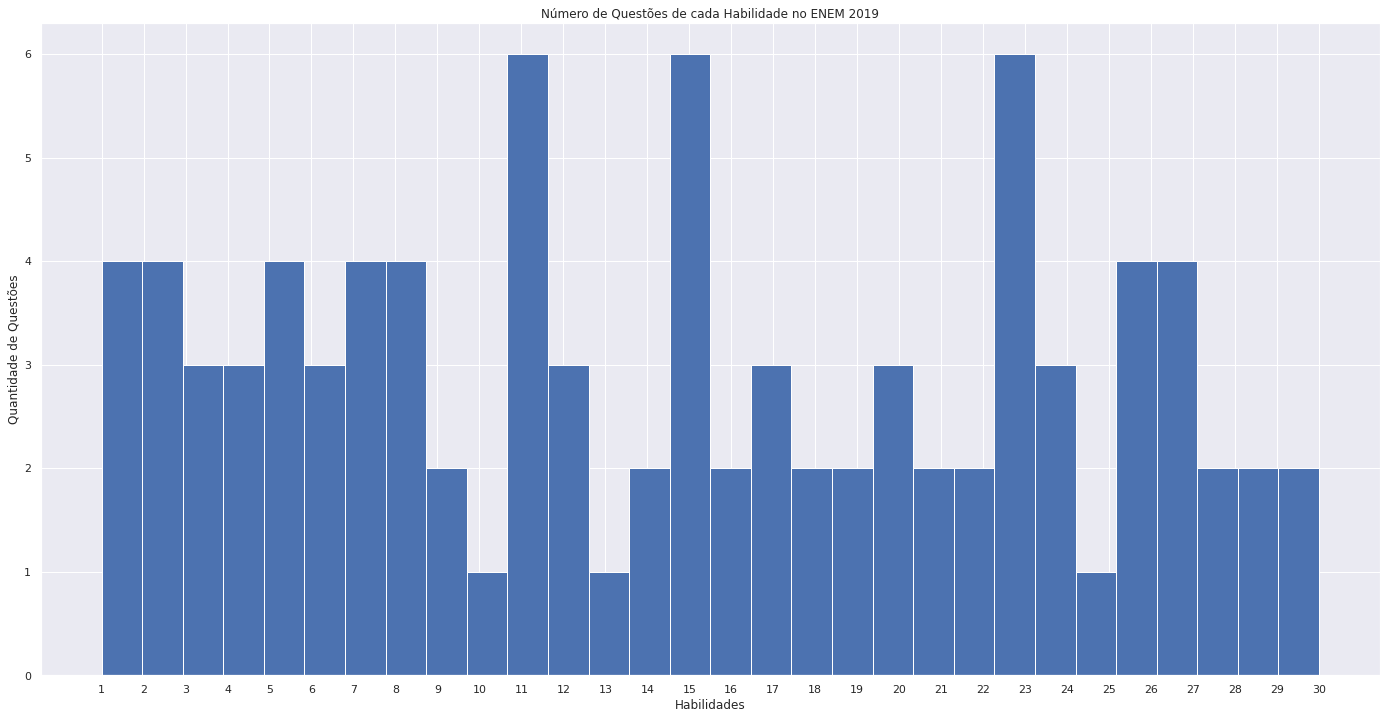

In [165]:
sns.set()
ch.astype(str).hist(bins=30, histtype = 'barstacked', figsize=(24,12))
plt.title("Número de Questões de cada Habilidade no ENEM 2019")
plt.ylabel('Quantidade de Questões')
plt.xlabel('Habilidades')
